# Housing Prices: Advanced Regression Analysis

## Import necessary libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

## Read data files

In [102]:
df_Train = pd.read_csv("train.csv")
df_Test = pd.read_csv("test.csv")

In [103]:
print(df_Train.shape)
print(df_Test.shape)

(1460, 81)
(1459, 80)


## Oview data

In [104]:
df_Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
df_Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [106]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
print("Training data : ", df_Train.shape)
print("Test data     : ", df_Test.shape)

Training data :  (1460, 81)
Test data     :  (1459, 80)


In [108]:
s = (df_Train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df_Train.dtypes == 'int64')
num_cols_int = list(s[s].index)
print("Integer variables:")
print(num_cols_int)

s = (df_Train.dtypes == 'float')
num_cols_float = list(s[s].index)
print("Real variables:")
print(num_cols_float)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'En

In [109]:
# f_desc = open('data_description.txt')
# print(f_desc.read())
# f_desc.close()

### Missing Values:

-  Combine training and test data into a single dataframe

In [110]:
# Training data :  (1460, 81)
# Test data     :  (1459, 80)
df = [df_Train,df_Test]
df_combined = pd.concat(df).reset_index(drop=True)

In [111]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [112]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Note:
- Fence, MiscFeature, PoolQC, FireplaceQu, MasVnrType, Alley. This columns have more NA (>1000). So we need to drop all of this. Except col: Sale price. Because when we combine train and test. Test don't have Sale Price column.

### SalePrice
- Check distribution value in **SalePrice** column

In [113]:
df_Train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

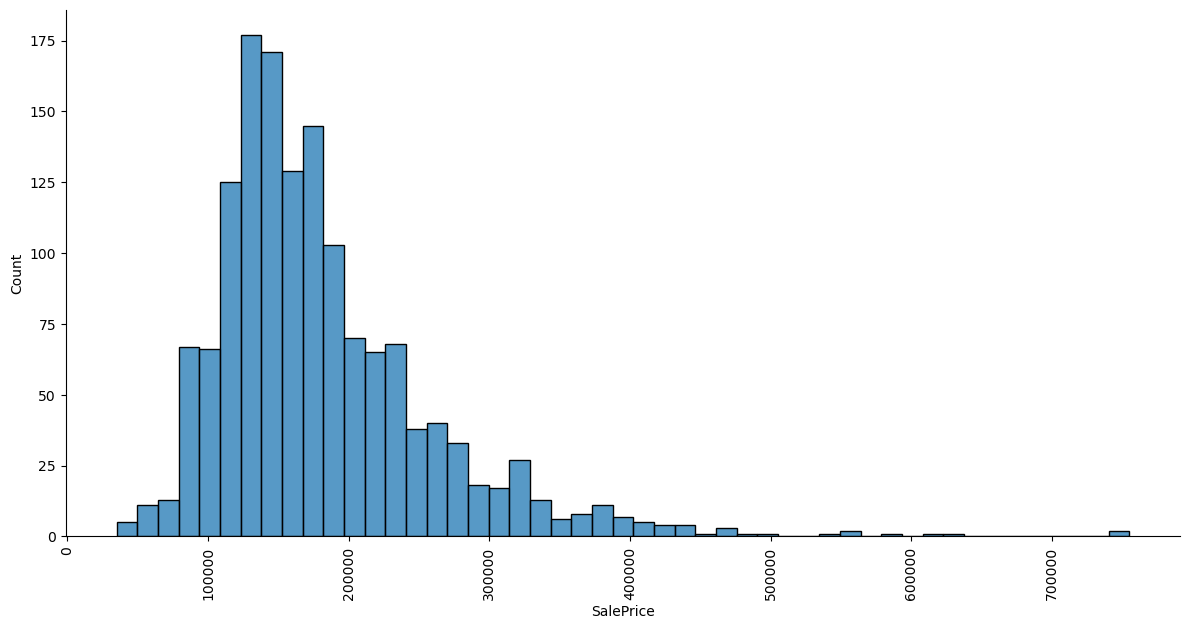

In [114]:
sns.displot(df_Train['SalePrice'], height=6, aspect=2)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

<Axes: >

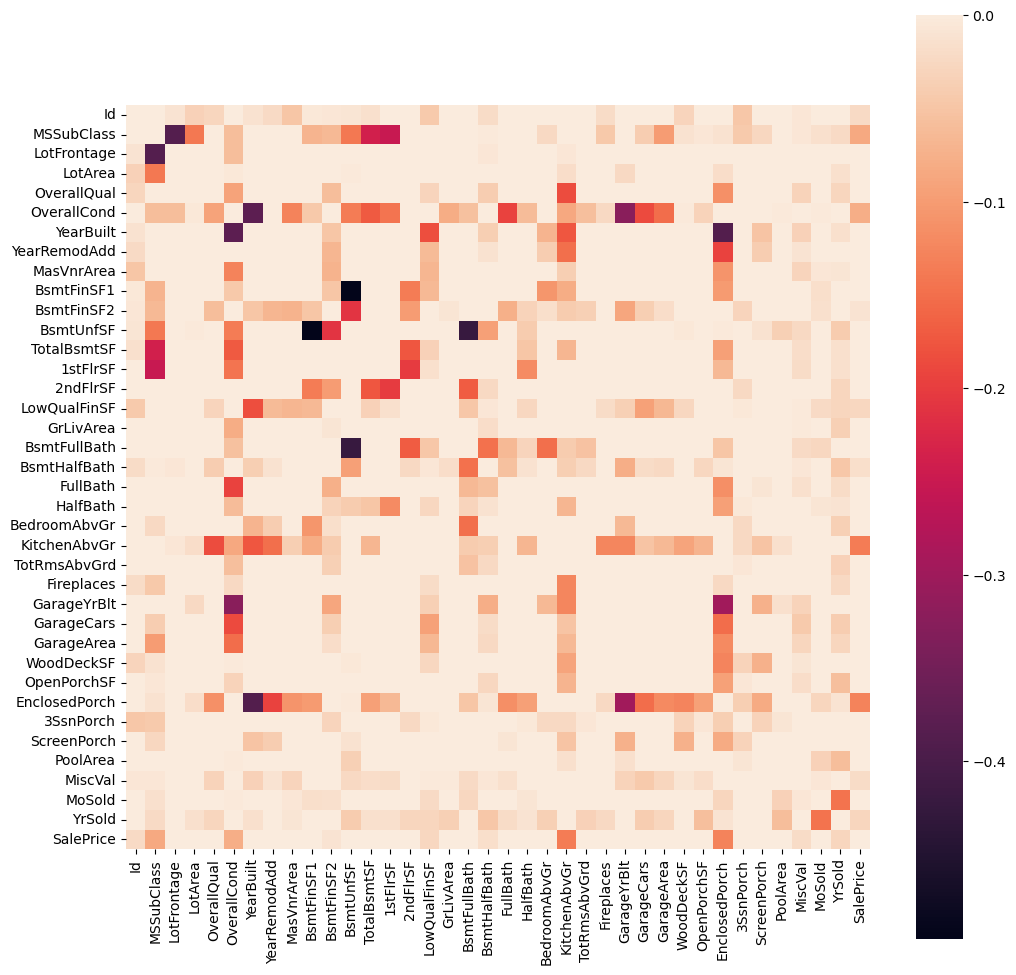

In [115]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_Train.select_dtypes(include=['number']).corr(), vmax=0, square=True)

<Axes: >

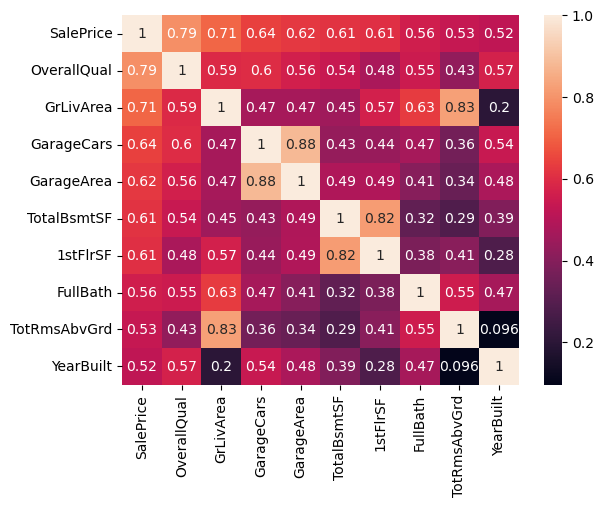

In [116]:
# After test k = 20, 15, 10 -> So The best k = 10. 
k = 10
cols = df_Train.select_dtypes(include=['number']).corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_Train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

### Note:
- Top 10 features that have high correlation with SalePrice: OverallQual, GrLivArea, GarageCars,GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt.

---> These features are good enough for the model to train with.

## Data Preprocessing
- columns_to_drop = ['Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley']

- The values of the numbers themselves can impact the model. To avoid the numerical influence during classification, we do one-hot encoding using **get_dummies method**
- missing values with mean

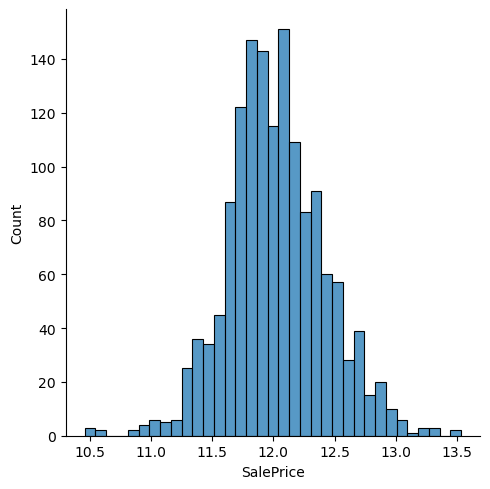

In [117]:
# fit sale price as close as possible to a normal distribution.
y_train = np.log1p(df_Train.pop('SalePrice'))
sns.displot(y_train)

In [118]:
# group train and test sets together for feature processing
all_df = pd.concat([df_Train, df_Test], axis=0)
all_df.reset_index(inplace=True)
all_df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [119]:
#  more NA (>1000)
columns_to_drop = ['Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley']
all_df.drop(columns=columns_to_drop, inplace=True)

In [120]:
all_df.shape

(2919, 75)

In [121]:
all_df.MSSubClass.value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

#### Onehot encoding

In [122]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [123]:
all_df = pd.get_dummies(all_df)
all_df.shape

(2919, 268)

In [124]:
# identify missing values
all_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
BsmtFinSF1        1
GarageArea        1
TotalBsmtSF       1
BsmtFinSF2        1
dtype: int64

In [125]:
# replace missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

all_df = pd.DataFrame(imputer.fit_transform(all_df), columns=all_df.columns)

all_df.isnull().sum().sum()

0

In [126]:
numeric_cols = df_Train.select_dtypes(include=['number']).columns

numeric_col_mean = all_df.loc[:, numeric_cols].mean()
numeric_col_std = all_df.loc[:, numeric_cols].std()
all_df.loc[:, numeric_cols] = (all_df.loc[:, numeric_cols] - numeric_col_mean) / numeric_col_std

- all_df.loc[:, numeric_cols] = (all_df.loc[:, numeric_cols] - numeric_col_mean) / numeric_col_std: This step performs data normalization. Specifically:

- (all_df.loc[:, numeric_cols] - numeric_col_mean): Subtracts the mean values of each numerical column from all values in the corresponding column.
- numeric_col_std: Divides the result by the standard deviation of each numerical column.
- The result is that each value in the numerical columns is normalized so that they have a mean close to 0 and a standard deviation close to 1, making the data easier to compare and work with.

#### Slip train and test dataset 

In [127]:
dummy_train_df = all_df.loc[df_Train.index]
dummy_test_df = all_df.loc[df_Test.index]

dummy_train_df.drop(columns=['index'], inplace=True)
dummy_test_df.drop(columns=['index'], inplace=True)

print(dummy_train_df.shape, dummy_test_df.shape)

(1460, 267) (1459, 267)


## Model selection and prediction

In [128]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set
# dummy_train_df, y_train

X_train, X_valid, Y_train, Y_valid = train_test_split(dummy_train_df, y_train, train_size=0.8, test_size=0.2,random_state=0)

In [129]:
resultModels = []

In [130]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred_RF = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred_RF))



0.09252206260358053


In [131]:
resultModels.append(Y_pred_RF)

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred_GBR = model_GBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred_GBR))

0.08891290200948661


In [133]:
resultModels.append(Y_pred_GBR)

In [134]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train, Y_train)
Y_pred = model_SGD.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

0.1842514781787644


In [135]:
resultModels.append(Y_pred)

In [136]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

0.0914904716545683


In [137]:
resultModels.append(Y_pred)

In [138]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [139]:
grid_cv.best_score_

-0.0939811592639763

In [140]:
grid_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
Y_pred = grid_cv.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

0.09024361227612346


In [142]:
resultModels.append(Y_pred)

## Visualization

In [172]:
def plot_comparison(y_train, y_pred, namelabel):
    """
    Plots a comparison between actual sale prices (y_train) and predicted sale prices (y_pred).
    
    Parameters:
    y_train (array-like): Actual sale prices.
    y_pred (array-like): Predicted sale prices.
    namelabel (str): The label for the predictions.
    """
    plt.figure()
    plt.title(f'Comparison of Sale Price of Predicted and Actual values')
    
    # Plot the actual sale prices
    plt.scatter(y_train, y_train, label='Train', alpha=0.5)
    
    # Plot the predicted sale prices
    plt.scatter(y_train, y_pred, label=namelabel, alpha=0.5)
    
    # Add the y=x reference line
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.legend()
    plt.xlabel(namelabel)
    
    # Show the plot
    plt.show()

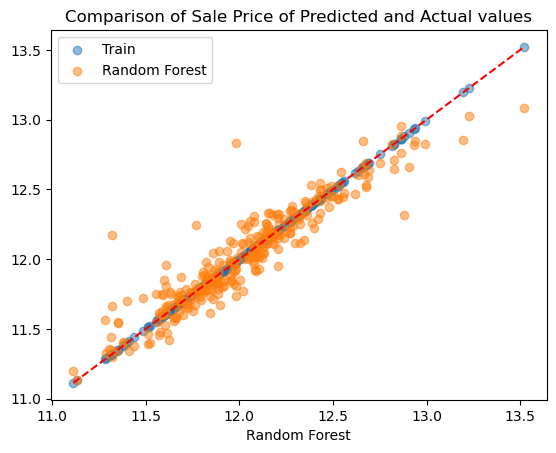

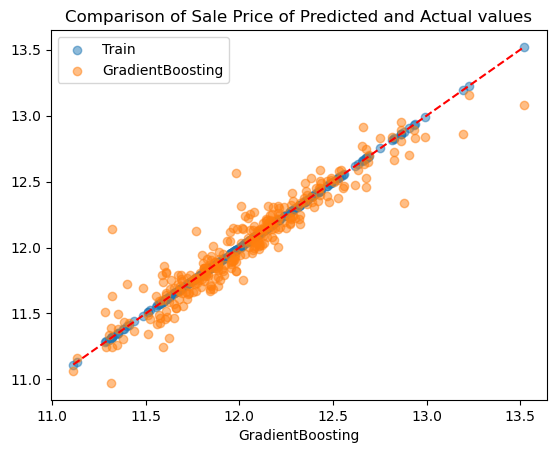

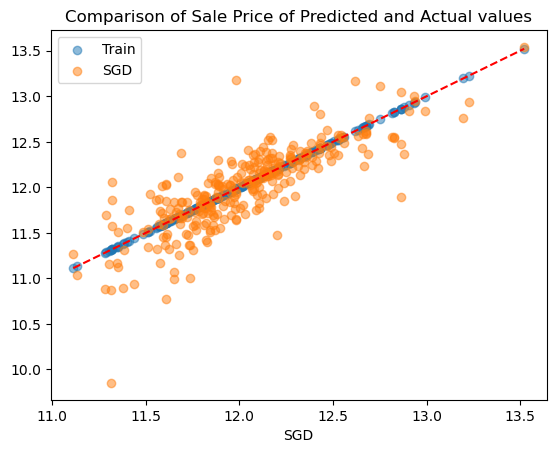

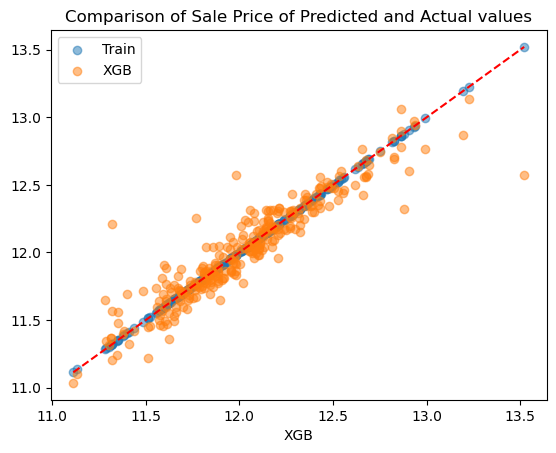

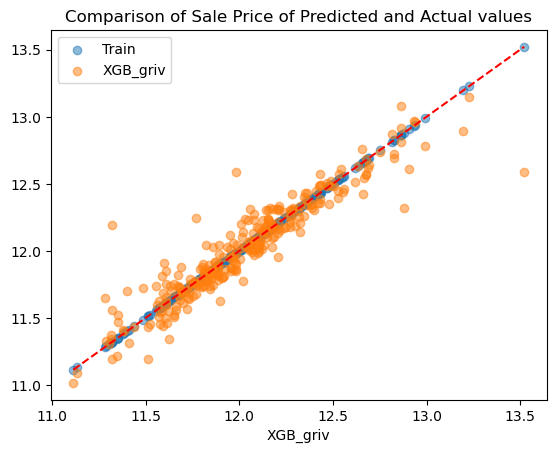

In [173]:
# resultModels 
listNameModels = ['Random Forest', "GradientBoosting", "SGD", "XGB", "XGB_griv"]

for i in range(len(listNameModels)):
    plot_comparison(Y_valid, resultModels[i], listNameModels[i])
    # print(i)

## Compare with **test** dataset

In [169]:
import pandas as pd

def create_prediction_dataframe(dummy_test_df, models):
    """
    Creates a DataFrame with predictions from multiple models based on the given dummy test DataFrame.
    
    Parameters:
    dummy_test_df (DataFrame): DataFrame containing test data.
    models (dict): Dictionary containing model names as keys and model objects as values.
    
    Returns:
    DataFrame: DataFrame containing predictions from each model.
    """
    # Create an empty DataFrame to store predictions
    predictions_df = pd.DataFrame()
    
    # Iterate over each model
    for model_name, model in models.items():
        # Predict on the test data using the current model
        predictions = model.predict(dummy_test_df)
        
        # Add the predictions to the DataFrame with the corresponding model name as column header
        predictions_df[model_name] = predictions
    
    return predictions_df

In [168]:
models = {
    'model_RFR': model_RFR,
    'model_GBR': model_GBR,
    'model_SGD': model_SGD,
    'model_XGBR': model_XGBR,
    'grid_cv': grid_cv
}
predictions_df = create_prediction_dataframe(dummy_test_df, models)
print(predictions_df.head())  # Display the first few rows of the predictions DataFrame

   model_RFR  model_GBR  model_SGD  model_XGBR    grid_cv
0  12.242473  12.227786  12.284410   12.225678  12.232110
1  12.024472  12.022173  12.397154   12.068933  12.071091
2  12.290562  12.217618  12.295246   12.253666  12.253528
3  11.965305  11.964332  12.241360   11.880568  11.855219
4  12.545237  12.587023  12.489661   12.561295  12.574214
